# 통계적 회귀???

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv"
data = pd.read_csv(data_url)
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## 데이터 구조
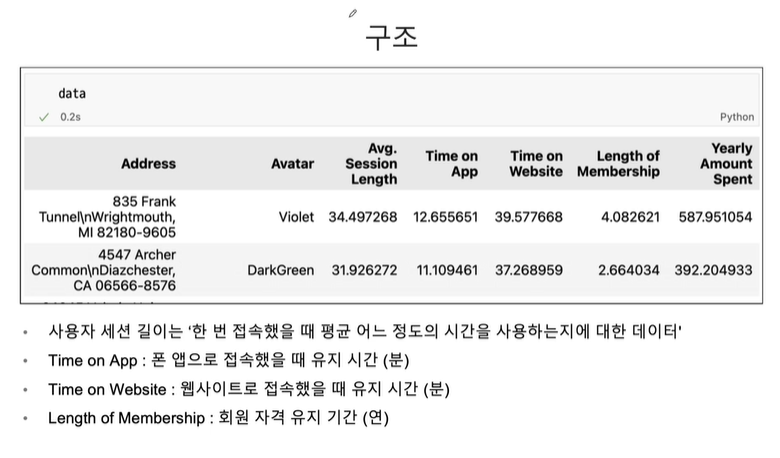

## 필요없는 컬럼 삭제

In [3]:
data.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


## 컬럼별 boxplot

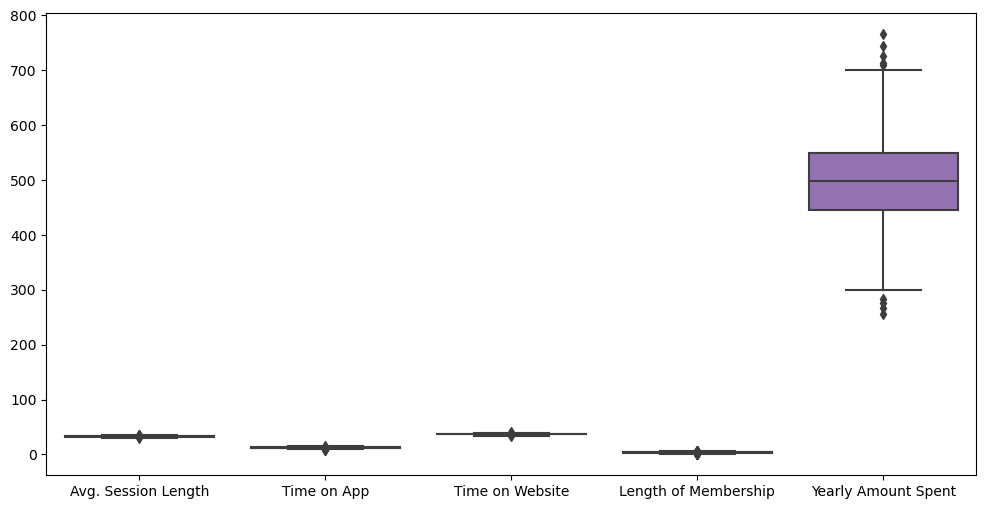

In [4]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data);

- yearly Amount Spent 는 따로 봐야겠다

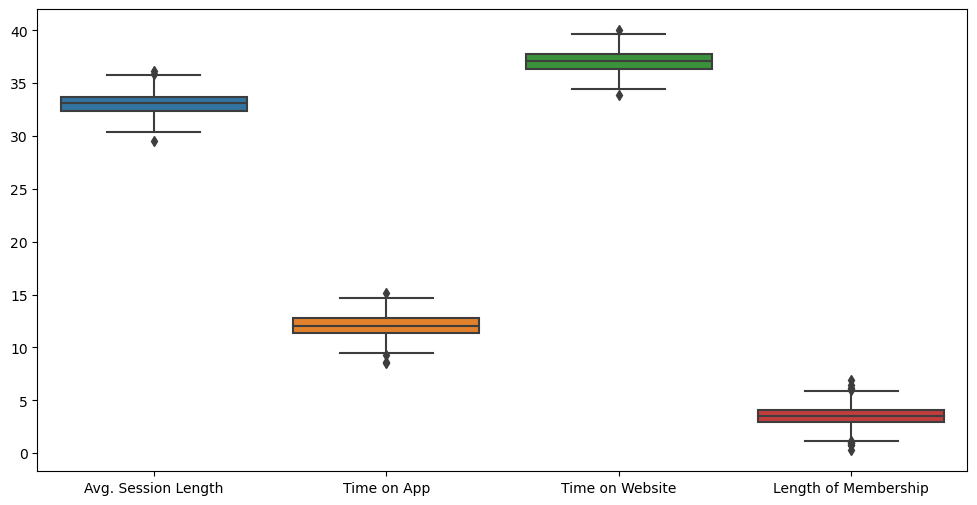

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data.iloc[:,:-1]);

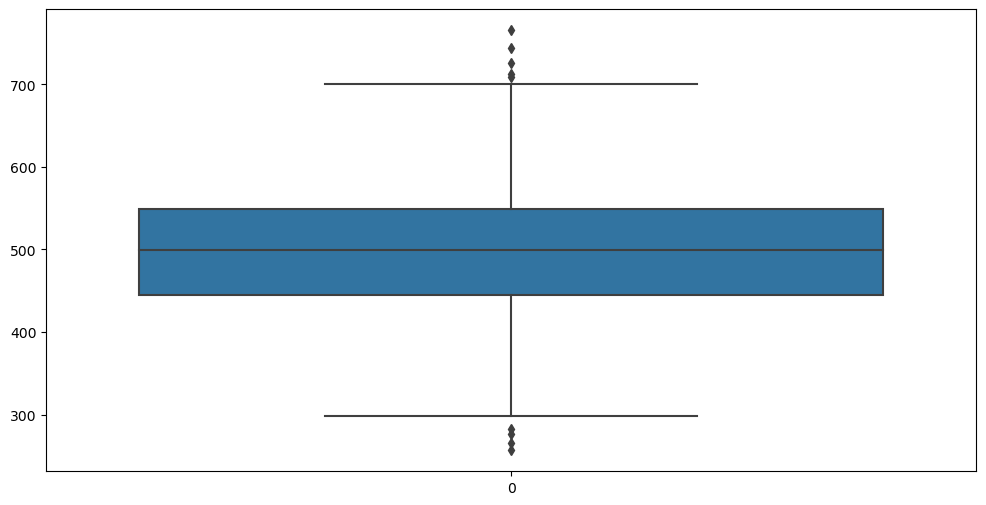

In [7]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data['Yearly Amount Spent']);

## pairplot으로 경향을 확인하자

<Figure size 1200x600 with 0 Axes>

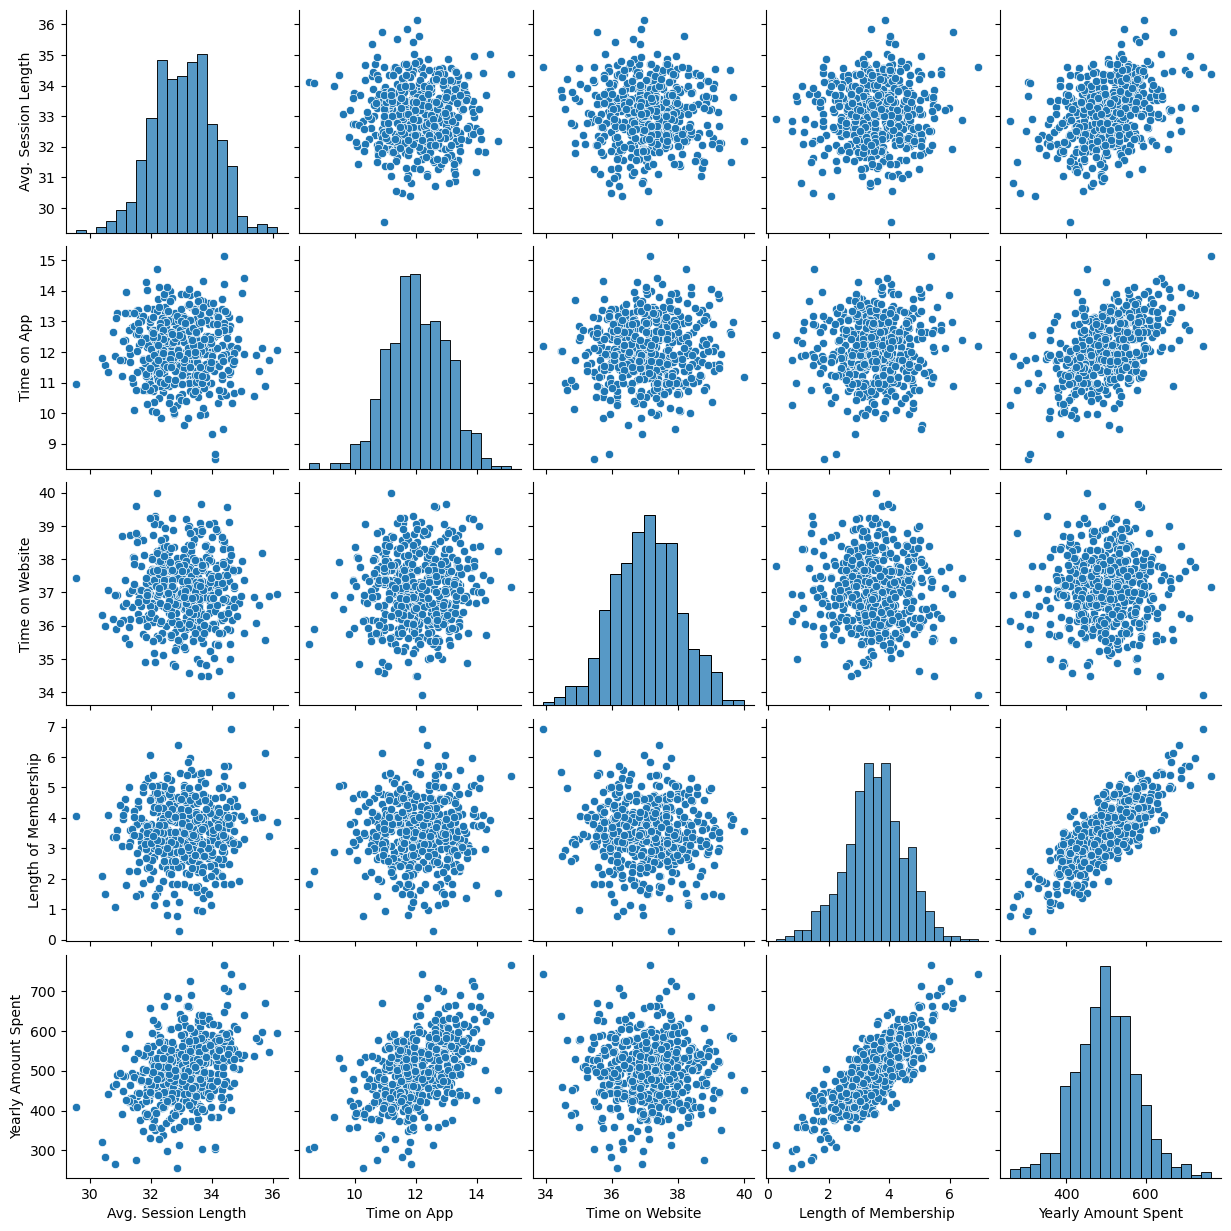

In [8]:
plt.figure(figsize=(12,6))
sns.pairplot(data=data);

- 큰 상관관계를 보이는 것은 멤버쉽 유지 기간이다.

## lmplot으로 멤버쉽 유지기간, 연간 사용 시간 확인

<Figure size 1200x600 with 0 Axes>

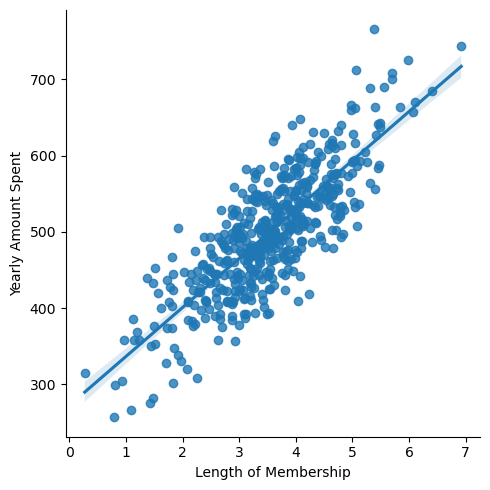

In [11]:
plt.figure(figsize=(12,6));
sns.lmplot(x ='Length of Membership', y='Yearly Amount Spent', data=data);

## 큰 상관관계를 보이는 멤버쉽 유지 기간으로 통계적 회귀를 해보자

- OLS : 최소자승법(OLS: Ordinary Least Squares)는 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법이다.
- 독립변수만 있는 데이터프레임 dfX와 종속변수만 있는 데이터프레임 dfy를 인수로 넣어서 만들 수도 있다.
    - 이 때는 독립변수만 있는 데이터프레임 dfX가 상수항을 가지고 있어야 한다.

In [16]:
# OLS(y, X) : (기준, 상관관계가 있다고 판단된 파라미터)

import statsmodels.api as sm

X = data['Length of Membership']
y = data['Yearly Amount Spent']
lm = sm.OLS(y, X).fit()

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Wed, 30 Aug 2023   Prob (F-statistic):                        0.00
Time:                         12:28:46   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 밑에 Note에서 상수항이 없다고 말한다. 상수항을 만들어 줘야한다.

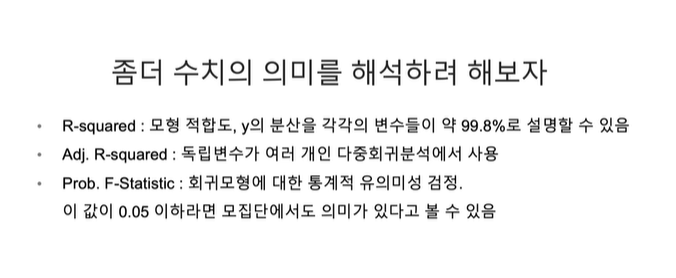

통계적 회귀 관점
- 내가 분석한 모델이 정규분포에 따르냐....
- 모집단을 잘 추종 하느냔...

## 일단 회귀 모델을 그려보자

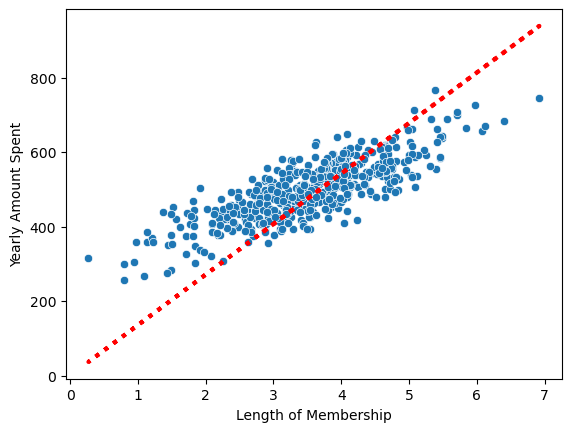

In [20]:
pred = lm.predict(X)

sns.scatterplot(x=X,y=y)
plt.plot(X,pred, 'r',ls=':', lw=3);

- 상수항이 없기 떄문에 0,0 지난다!
- 그래서 직선이 아래로 약간 기울어졌다.

## 진짜 상수항이 없는지 연장선을 그려보자

(0.0, 765.5184619388373, 0.0, 765.5184619388373)

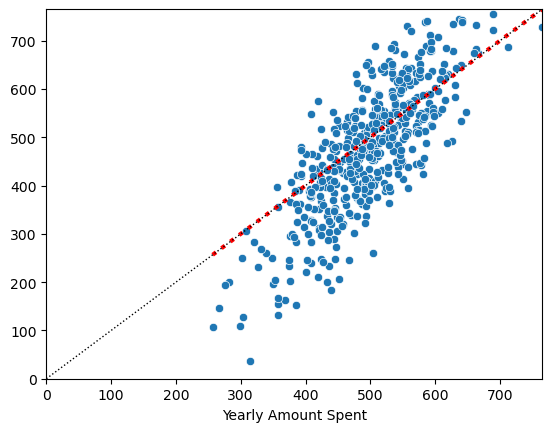

In [26]:
sns.scatterplot(x=y,y=pred) # 참값 기준 예측값?
plt.plot([min(y), max(y)], [min(y), max(y)], 'r', ls=':', lw=3) # 참값의 최대 최소를 좌표
plt.plot([0, max(y)], [0, max(y)], 'k', ls=':', lw=1) # 0,0 부터 그려라
plt.axis([0, max(y), 0, max(y)])

## 상수항을 넣어주자 ( X 에 1열을 추가)
c_ 사용하면 편함

In [27]:
X = np.c_[X, [1]*len(X)]
X[:5]

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ]])

## 다시 학습!

In [28]:
lm = sm.OLS(y, X).fit()

In [29]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Wed, 30 Aug 2023   Prob (F-statistic):          4.81e-117
Time:                         12:42:48   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- const, x1 값이 잡힌 것을 볼 수 있따.
- AIC : 낮을 수록 좋은 뜻.
    - 내가 만들어낸 모델이 나의 데이터를 얼마나 잘 반영하는지 척도
    - 정확히는 내가 만들어낸 모델이 원래의 정보를 얼마나 손실시키는지의 정도이다.
    - 낮을수록 좋지 
- R-squared : 평균을 기준으로 예측값과 실제값의 편차가 상대적으로 얼마나 작게 가지는지?

## 결과

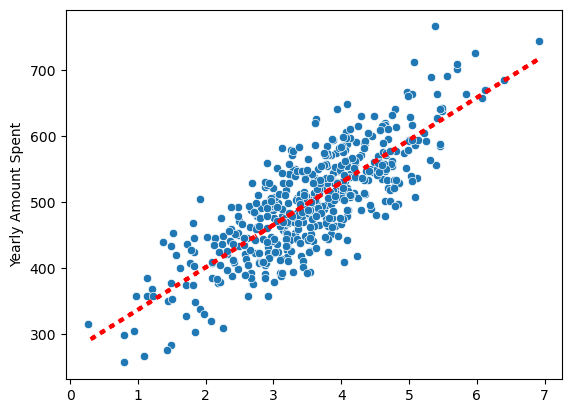

In [30]:
pred = lm.predict(X)

sns.scatterplot(x=X[:,0],y=y)
plt.plot(X[:,0], pred, 'r',ls=':', lw=3);

# 참값 vs 예측값

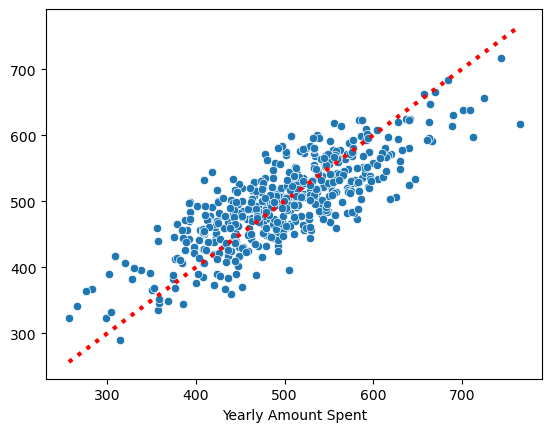

In [31]:
pred = lm.predict(X)

sns.scatterplot(x=y, y=pred)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r',ls=':', lw=3);

## 데이터 분리 후 평가!

In [32]:
from sklearn.model_selection import train_test_split

X = data.drop('Yearly Amount Spent', axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=13)

## 네 개의 컬럼 모두를 변수로 사용해서 회귀 해보자

In [35]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.179e+04
Date:                 Wed, 30 Aug 2023   Prob (F-statistic):                        0.00
Time:                         12:56:53   Log-Likelihood:                         -1591.7
No. Observations:                  350   AIC:                                      3191.
Df Residuals:                      346   BIC:                                      3207.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.8431      0.906     13.070      0.000      10.061      13.625
Time on App             35.2169      1.212     29.046      0.000      32.832      37.602
Time on Website        -14.2536      0.840    -16.960      0.000     -15.907     -12.601
Length of Membership    60.1702      1.275     47.183      0.000      57.662      62.678
==============================================================================
Omnibus:                        0.648   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.755
Skew:                          -0.042   Prob(JB):                        0.686
Kurtosis:                       2.788   Cond. No.                         55.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 참 값 vs 예측값

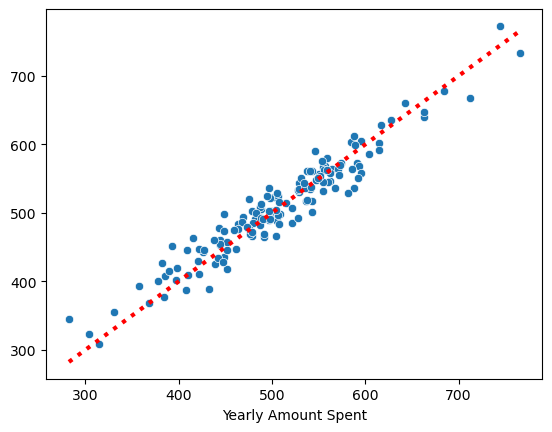

In [37]:
pred = lm.predict(X_test) # 테스트 데이터 넣어서 예측 값 추출

# 참값 , 예측값 의 점들, 대각선 비슷하게 모여있으면 잘 예측했다 볼수 있다.
sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r',ls=':', lw=3); # 추세선